# Analysis of cleaned Bubble Sort data, PC 16 only
## This notebook is used to answer SQ 2, SQ 3 and the RQ of our project. 

#### Imports and loading CSVs in Dataframes

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

dfBubble6 = pd.read_csv("CleanData/BubbleClean-PC6.csv")
dfBubble16 = pd.read_csv("CleanData/BubbleClean-PC16.csv")
dfBubble21 = pd.read_csv("CleanData/BubbleClean-PC21.csv")
dfBubble23 = pd.read_csv("CleanData/BubbleClean-PC23.csv")

dfQuick16 = pd.read_csv("CleanData/QuickClean-PC16.csv")
dfRead6 = pd.read_csv("CleanData/readCSVClean-PC6.csv")
dfRead16 = pd.read_csv("CleanData/readCSVClean-PC16.csv")
dfRead21 = pd.read_csv("CleanData/readCSVClean-PC21.csv")
dfRead23 = pd.read_csv("CleanData/readCSVClean-PC23.csv")


dfBubble16.head()

###SUMMER ANALYSIS NOT DONE YET
#dfBubble16 = pd.read_csv("/CleanCSVs/BubbleSort-400runsClean-PC16.csv")

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,3.971802,3.439758,0.211914,436.274,67.0,best,25000.0
1,3.906067,3.412231,0.196228,387.021,67.0,best,25000.0
2,4.092834,3.593201,0.196289,403.466,67.0,best,25000.0
3,4.208069,3.704956,0.201599,407.394,67.0,best,25000.0
4,3.952576,3.416504,0.207581,446.493,67.0,best,25000.0


In [89]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.240601,1.966187,0.134399,227.880,53.0,random1,25000
1,2.062317,1.775085,0.126160,250.212,53.0,random1,25000
2,2.140869,1.876709,0.121887,222.526,53.0,random1,25000
3,2.217102,1.940735,0.133545,226.620,53.0,random1,25000
4,2.058533,1.796814,0.119385,219.516,53.0,random1,25000


In [90]:
def calcMean(df,type,size):
    rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
    rowMean["Input case"] = type
    return rowMean
    

def meansOfTests(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfBubbleMean6 = meansOfTests(dfBubble6)
dfBubbleMean16 = meansOfTests(dfBubble16)
dfBubbleMean21 = meansOfTests(dfBubble21)
dfBubbleMean23 = meansOfTests(dfBubble23)

dfQuickMean16 = meansOfTests(dfQuick16)
dfBubbleMean16


C:\Users\langk\AppData\Local\Temp\ipykernel_10568\278722509.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\278722509.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\278722509.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\278722509.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only va

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,4.131148,3.619166,0.20069,409.145475,68.345324,25000.0,best
1,7.626052,6.677479,0.296455,877.970982,66.057971,50000.0,best
2,16.707994,14.668513,0.503585,2100.780803,62.67313,75000.0,best
3,27.213635,23.920853,0.740464,3502.269185,61.622283,100000.0,best
4,99.29771,87.470659,2.348407,13055.811026,61.4,200000.0,best
...,...,...,...,...,...,...,...
91,144.97787,126.160972,3.645301,21001.258333,58.972222,100000.0,random10
92,580.759333,505.307604,14.213512,84529.269697,58.575758,200000.0,random10
93,1308.053717,1139.029851,31.638405,189277.368421,59.894737,300000.0,random10
94,2324.825108,2024.554775,56.202869,335992.542857,60.285714,400000.0,random10


In [91]:

def listOfCases(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def meansOfTestsReadCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = listOfCases(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean6 = meansOfTestsReadCSV(dfRead6)
dfReadMean16 = meansOfTestsReadCSV(dfRead16)
dfReadMean21 = meansOfTestsReadCSV(dfRead21)
dfReadMean23 = meansOfTestsReadCSV(dfRead23)
dfReadMean16

C:\Users\langk\AppData\Local\Temp\ipykernel_10568\278722509.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\278722509.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\278722509.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\278722509.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only va

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.149151,1.873956,0.12836,231.807079,53.973684,25000.0,random1
1,2.519434,2.185134,0.150334,264.781167,57.0,50000.0,random1
2,3.059938,2.668515,0.178193,304.554189,61.0,75000.0,random1
3,3.524851,3.07726,0.205626,343.570833,63.527778,100000.0,random1
4,4.166064,3.626851,0.233299,420.754475,65.425,200000.0,random1
...,...,...,...,...,...,...,...
333,5.763458,5.003655,0.308558,583.526809,71.98708,600000.0,sorted
334,6.14807,5.330668,0.330684,631.253355,70.911227,700000.0,sorted
335,6.699112,5.808665,0.349253,706.15588,70.140665,800000.0,sorted
336,7.187969,6.251243,0.367782,776.198304,69.328084,900000.0,sorted


In [92]:
dfBubbleMean6 = dfBubbleMean6.reset_index(drop=True)
dfBubbleMean16 = dfBubbleMean16.reset_index(drop=True)
dfBubbleMean21 = dfBubbleMean21.reset_index(drop=True)
dfBubbleMean23 = dfBubbleMean23.reset_index(drop=True)

dfQuickMean16 = dfQuickMean16.reset_index(drop=True)
dfReadMean6 = dfReadMean6.reset_index(drop=True)
dfReadMean16 = dfReadMean16.reset_index(drop=True)
dfReadMean21 = dfReadMean21.reset_index(drop=True)
dfReadMean23 = dfReadMean23.reset_index(drop=True)

dfBubbleMean16
#remove nans here?

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,4.131148,3.619166,0.20069,409.145475,68.345324,25000.0,best
1,7.626052,6.677479,0.296455,877.970982,66.057971,50000.0,best
2,16.707994,14.668513,0.503585,2100.780803,62.67313,75000.0,best
3,27.213635,23.920853,0.740464,3502.269185,61.622283,100000.0,best
4,99.29771,87.470659,2.348407,13055.811026,61.4,200000.0,best
...,...,...,...,...,...,...,...
91,144.97787,126.160972,3.645301,21001.258333,58.972222,100000.0,random10
92,580.759333,505.307604,14.213512,84529.269697,58.575758,200000.0,random10
93,1308.053717,1139.029851,31.638405,189277.368421,59.894737,300000.0,random10
94,2324.825108,2024.554775,56.202869,335992.542857,60.285714,400000.0,random10


In [93]:
def deductReadFromAlg(dfMeanAlg, dfReadMean):
    lCPU = []
    lTime = []
    lDRAM = []

    for i in range(len(dfMeanAlg["Size"])):
        case = dfMeanAlg["Input case"][i]
        size = dfMeanAlg["Size"][i]
        #define best, worst and random inputs for each alg here!
        if case == "best":
                case2 = "sorted"
        if case == "worst":
            case2 = "reversesorted"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        rawCPU = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"].index.tolist()[0]]
        readCPU = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lCPU.append(rawCPU-readCPU)

        rawTime = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"].index.tolist()[0]]
        readTime = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["Time (ms)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lTime.append(rawTime - readTime)

        rawDRAM = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["DRAM (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        readDRAM = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["DRAM (J)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lDRAM.append(rawDRAM-readDRAM)

    dfMeanAlg["CPU - readCSV"] = lCPU
    dfMeanAlg["Time - readCSV"] = lTime
    dfMeanAlg["Memory - readCSV"] = lDRAM


deductReadFromAlg(dfBubbleMean6,dfReadMean6)
deductReadFromAlg(dfBubbleMean16,dfReadMean16)
deductReadFromAlg(dfBubbleMean21,dfReadMean21)
deductReadFromAlg(dfBubbleMean23,dfReadMean23)

deductReadFromAlg(dfQuickMean16,dfReadMean16)

dfBubbleMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_10568\977034404.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rawCPU = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\977034404.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  readCPU = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\977034404.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rawTime = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"].index.tolist

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV
0,4.131148,3.619166,0.20069,409.145475,68.345324,25000.0,best,1.934188,201.900091,0.086675
1,7.626052,6.677479,0.296455,877.970982,66.057971,50000.0,best,4.543261,631.845264,0.154319
2,16.707994,14.668513,0.503585,2100.780803,62.67313,75000.0,best,12.113200,1816.149317,0.332747
3,27.213635,23.920853,0.740464,3502.269185,61.622283,100000.0,best,21.055334,3188.023727,0.551743
4,99.29771,87.470659,2.348407,13055.811026,61.4,200000.0,best,83.830459,12658.438980,2.121239


In [94]:
dfBubbleMean16[dfBubbleMean16["Size"]==500000]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV
7,435.62393,383.594664,10.300272,57793.420566,60.177378,500000.0,best,378.931746,57254.718091,10.009797
15,808.179465,711.325519,19.124191,107507.616848,60.076087,500000.0,worst,706.634824,106962.204538,18.828578
23,3633.477382,3163.152159,89.028395,525555.314286,59.971429,500000.0,random1,3158.340906,524999.630000,88.729538
31,3637.737637,3167.814692,89.192311,525821.684211,61.026316,500000.0,random2,3162.993189,525260.077059,88.891742
39,3633.481506,3163.374351,88.659193,525443.888889,59.888889,500000.0,random3,3158.339991,524874.570616,88.339361
47,3641.312528,3171.283105,89.341412,526104.74359,61.051282,500000.0,random4,3166.312939,525529.835433,89.031714
55,3630.70324,3161.536529,88.975874,525922.828571,60.171429,500000.0,random5,3156.774795,525366.546329,88.680179
63,3636.109271,3166.601161,89.309141,525979.473684,60.0,500000.0,random6,3161.484503,525396.145789,88.991264
71,3631.737518,3162.497756,89.356032,525362.717949,60.051282,500000.0,random7,3157.737833,524810.322377,89.060704
79,3629.385496,3160.329063,89.069026,525076.605263,60.026316,500000.0,random8,3155.512575,524515.440419,88.768531


# PLOTS

## SQ 2: Time vs input size regressions

In [95]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10)
        if r2 > 0.5 and regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [96]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [97]:
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    size2 = []
    for case in ["best", "worst", "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                size2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    size2.append(df["Size"][getIndex(df,case+str(i),size)] * df["Size"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["Size^2"] = size2

calcPercent(dfBubbleMean6)
calcPercent(dfBubbleMean16)
calcPercent(dfBubbleMean21)
calcPercent(dfBubbleMean23)

calcPercent(dfQuickMean16)
dfBubbleMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_10568\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\langk\AppData\Local\Temp\ipykernel_10568\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFr

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,Size^2
0,4.131148,3.619166,0.20069,409.145475,68.345324,25000.0,best,1.934188,201.900091,0.086675,87.606776,100,2.020863,6.250000e+08
1,7.626052,6.677479,0.296455,877.970982,66.057971,50000.0,best,4.543261,631.845264,0.154319,87.561420,100,4.697579,2.500000e+09
2,16.707994,14.668513,0.503585,2100.780803,62.67313,75000.0,best,12.113200,1816.149317,0.332747,87.793384,100,12.445947,5.625000e+09
3,27.213635,23.920853,0.740464,3502.269185,61.622283,100000.0,best,21.055334,3188.023727,0.551743,87.900250,100,21.607077,1.000000e+10
4,99.29771,87.470659,2.348407,13055.811026,61.4,200000.0,best,83.830459,12658.438980,2.121239,88.089301,100,85.951698,4.000000e+10


In [98]:
dfBubbleMean16.to_csv("bubbleFinalData-PC16.csv", sep=",", index=False)

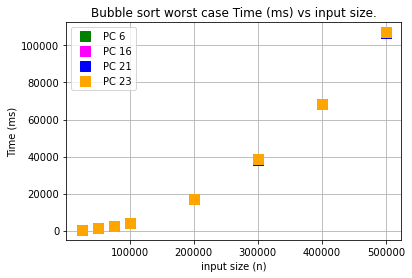

In [99]:
plt.plot(dfBubbleMean6[dfBubbleMean6["Input case"] == "worst"]["Size"], dfBubbleMean6[dfBubbleMean6["Input case"] == "worst"]["Time - readCSV"],"s", color="green",markersize=10, label="PC 6")
plt.plot(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],"s", color="fuchsia",markersize=10, label="PC 16")
plt.plot(dfBubbleMean21[dfBubbleMean21["Input case"] == "worst"]["Size"], dfBubbleMean21[dfBubbleMean21["Input case"] == "worst"]["Time - readCSV"],"s", color="blue",markersize=10, label="PC 21")
plt.plot(dfBubbleMean23[dfBubbleMean23["Input case"] == "worst"]["Size"], dfBubbleMean23[dfBubbleMean23["Input case"] == "worst"]["Time - readCSV"],"s", color="orange",markersize=10, label="PC 23")

plt.title("Bubble sort worst case Time (ms) vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()

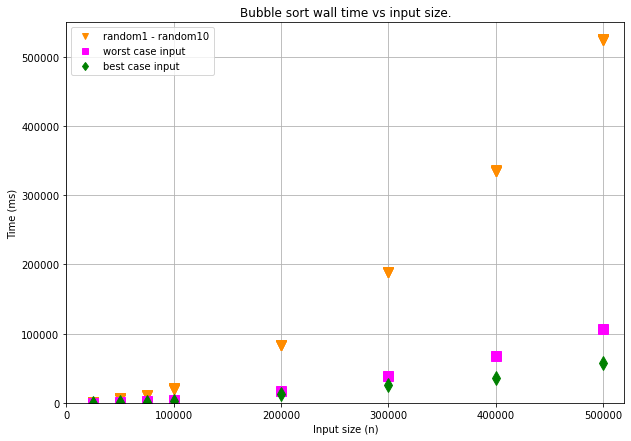

In [113]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(-100000,-100000,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(-100000,-100000,"s", color="fuchsia",label="worst case input")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-100000,-100000,"d", color="green",label="best case input")
#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort wall time vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Time (ms)")
plt.ylim(0,550000)
plt.xlim(0,520000)
plt.grid()
plt.legend()
plt.show()


## SQ 2: Time vs BigO

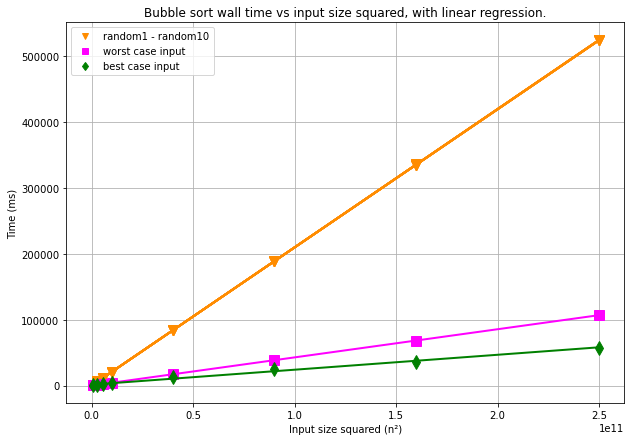

In [101]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="best case input")
#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort wall time vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()


## Zoom: Time vs n^2

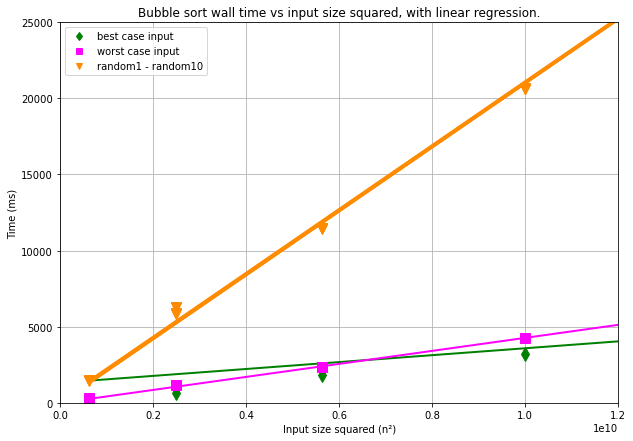

In [114]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-100000,-100000,"d", color="green",label="best case input")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-100000,-100000,"s", color="fuchsia",label="worst case input")
for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(-100000,-100000,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort wall time vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Time (ms)")
plt.grid()
plt.xlim(0,12000000000)
plt.ylim(0,25000)
plt.legend()
plt.show()


## SQ 3: Energy vs. Time


random0 R2 0.999997433003335  

random1 R2 0.9999971392595249  

random2 R2 0.99999747209243  

random3 R2 0.9999953520902848  

random4 R2 0.9999975480205561  

random5 R2 0.9999976042488778  

random6 R2 0.9999974800753303  

random7 R2 0.9999979017593148  

random8 R2 0.9999974299087158  

random9 R2 0.9999972346024512  

worst R2  0.9999986726285937 

best R2  0.9999970964047878 



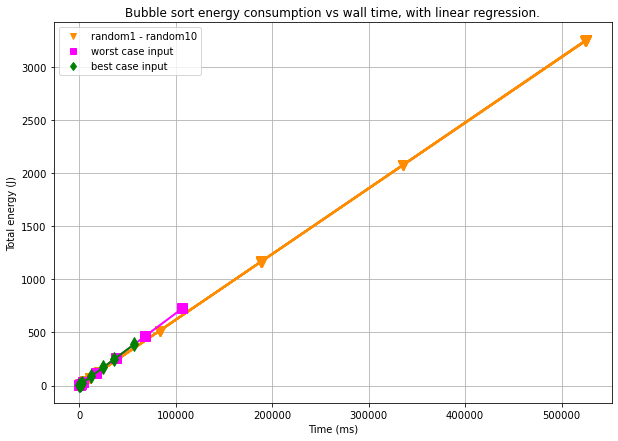

In [103]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="best case input")
print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.grid()
plt.show()


## Zoom: Energy vs. Time 

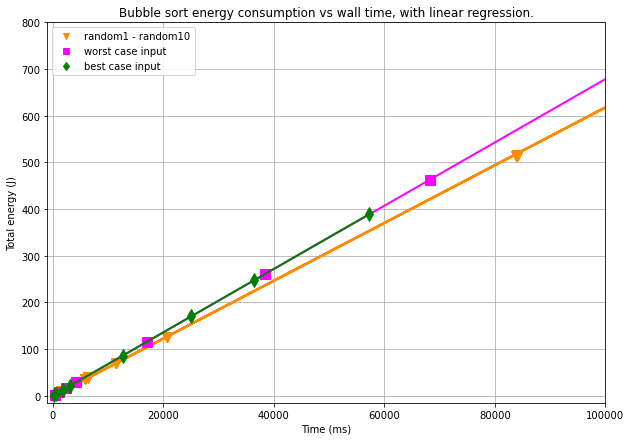

In [122]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="best case input")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.xlim(-1000,100000)
plt.ylim(-15,800)
plt.legend(loc="upper left")
plt.grid()
plt.show()

## RQ: EC vs BigO

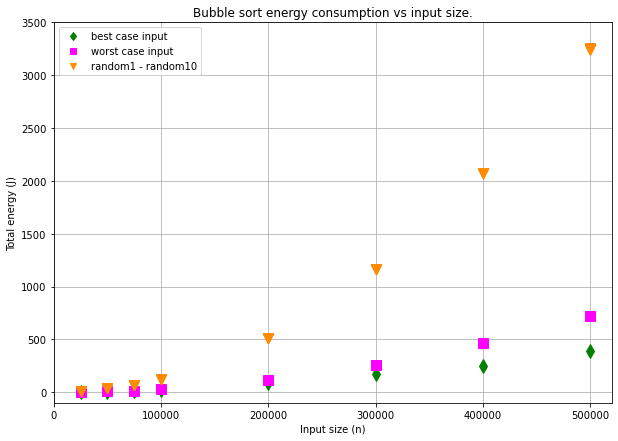

In [127]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-100000,-100000,"d", color="green",label="best case input")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(-100000,-100000,"s", color="fuchsia",label="worst case input")
for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(-100000,-100000,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort energy consumption vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.xlim(0,520000)
plt.ylim(-100,3500)
plt.grid()
plt.legend()
plt.show()

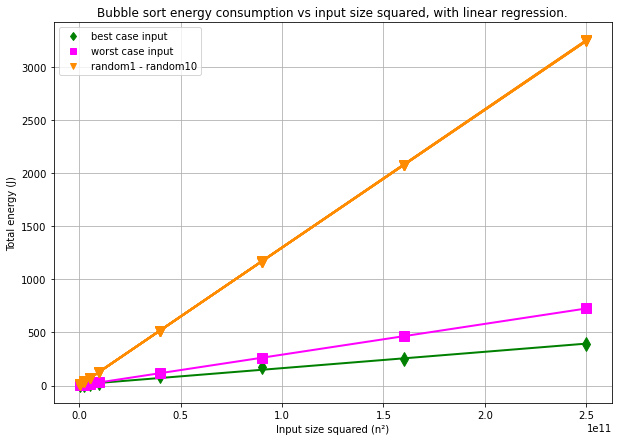

In [106]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(0,0,"d", color="green",label="best case input")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend()
plt.show()

## Zoom: Energy vs. BigO

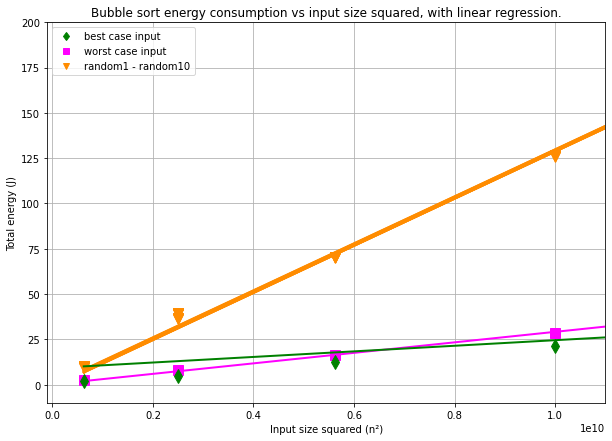

In [107]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(-110000000110,0,"d", color="green",label="best case input")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-1111000000011110,0,"s", color="fuchsia",label="worst case input")
for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(-111100000110,0,"v", color="darkorange",label="random1 - random10")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend(loc="upper left")
plt.xlim(-100000000,11000000000)
plt.ylim(-10,200)
plt.show()

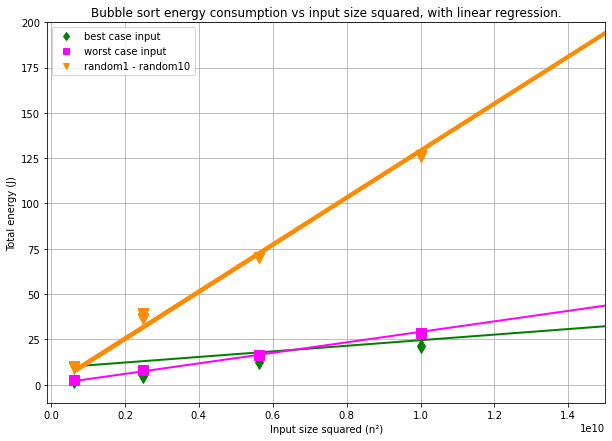

In [108]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-110000000110,0,"d", color="green",label="best case input")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-1111000000011110,0,"s", color="fuchsia",label="worst case input")
for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(-111100000110,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend(loc="upper left")
plt.xlim(-100000000,15000000000)
plt.ylim(-10,200)
plt.show()

# Ensuring that: polyReg 1. degree = LineReg 

LineReg: worst case r2 for bubble:  0.9999966696504422
polyReg: worst case r2 for bubble:  0.9999966696504422


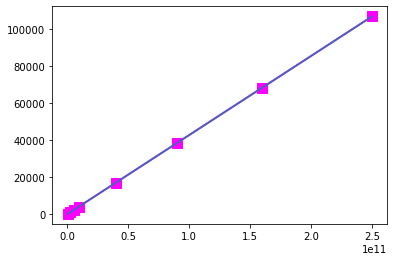

In [109]:
import matplotlib.pyplot as plt
from scipy import stats
y = dfBubbleMean16[dfBubbleMean16["Input case"]=="worst"]["Time - readCSV"]
x = dfBubbleMean16[dfBubbleMean16["Input case"]=="worst"]["Size^2"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")

print("LineReg: worst case r2 for bubble: ", metrics.r2_score(y,mymodel))
print("polyReg: worst case r2 for bubble: ", worst[1])
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show() 

# Comparing Quick WC to Bubble 

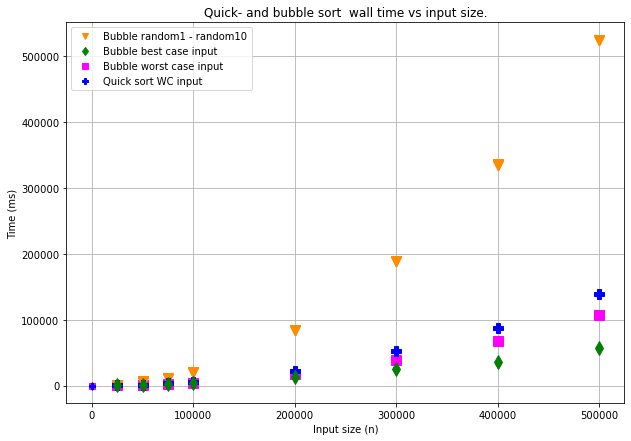

In [110]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
plt.plot(-0,0,"v", color="darkorange",label="Bubble random1 - random10")
plt.plot(-0,0,"d", color="green",label="Bubble best case input")
plt.plot(-0,0,"s", color="fuchsia",label="Bubble worst case input")
plt.plot(-0,0,"P", color="blue",label="Quick sort WC input")


worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
quickWorst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for best case input", "blue",dots="P",regLine=False)
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d",regLine=False)

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")

plt.title("Quick- and bubble sort  wall time vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend(loc="upper left")
plt.show()

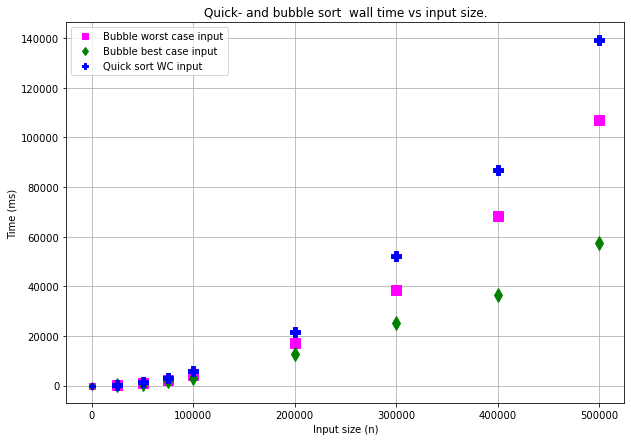

In [111]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
# plt.plot(-0,0,"v", color="darkorange",label="random1 - random10")
plt.plot(-0,0,"s", color="fuchsia",label="Bubble worst case input")
plt.plot(-0,0,"d", color="green",label="Bubble best case input")
plt.plot(-0,0,"P", color="blue",label="Quick sort WC input")


# for i in range(1,11):
#     Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d",regLine=False)
quickWorst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for best case input", "blue",dots="P",regLine=False)

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")

plt.title("Quick- and bubble sort  wall time vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend(loc="upper left")
plt.show()